In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
#Importing the data set
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Checking the data info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Checking percentage of null values.
df.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
#Checking unique values.
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

"Loan_ID" is nor related with the target variable "Loan_Status" , so we can drop the column "Loan_ID".

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"] = le.fit_transform(df['Gender'])
df["Married"] = le.fit_transform(df['Married'])
df["Education"] = le.fit_transform(df['Education'])
df["Self_Employed"] = le.fit_transform(df['Self_Employed'])
df["Property_Area"] = le.fit_transform(df['Property_Area'])
df["Loan_Status"] = le.fit_transform(df['Loan_Status'])
df["Dependents"] = le.fit_transform(df['Dependents'])

In [9]:
#Checking for categorical columns.
cate_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cate_col.append(x)
        
cate_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

<AxesSubplot:>

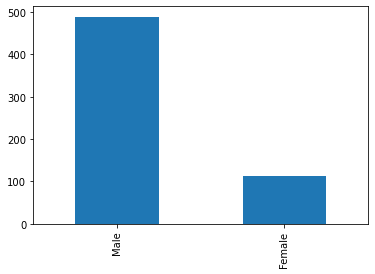

In [10]:
#Checking unique count for each feature and its distribution.
df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

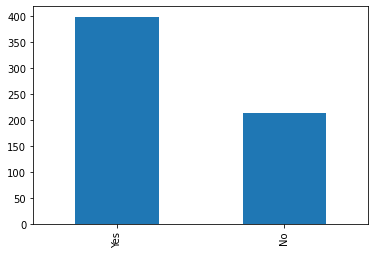

In [11]:
df['Married'].value_counts().plot(kind='bar')

<AxesSubplot:>

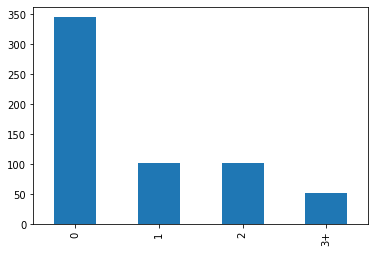

In [12]:
df['Dependents'].value_counts().plot(kind='bar')

<AxesSubplot:>

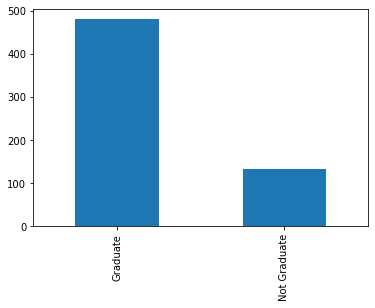

In [13]:
df['Education'].value_counts().plot(kind='bar')

<AxesSubplot:>

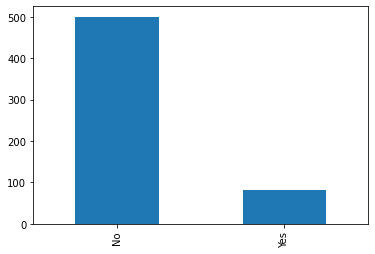

In [14]:
df['Self_Employed'].value_counts().plot(kind='bar')

<AxesSubplot:>

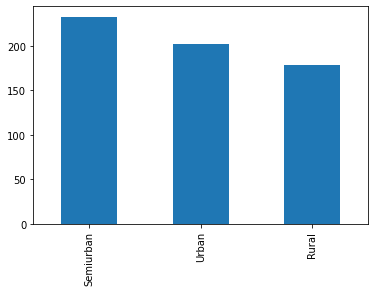

In [15]:
df['Property_Area'].value_counts().plot(kind='bar')

<AxesSubplot:>

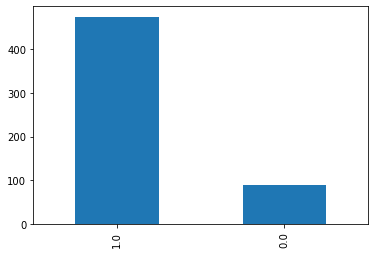

In [16]:
df['Credit_History'].value_counts().plot(kind='bar')

<AxesSubplot:>

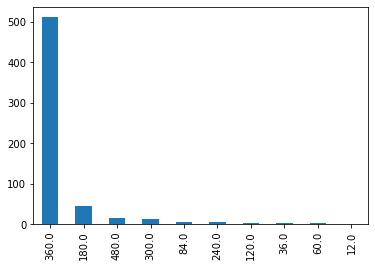

In [17]:
df['Loan_Amount_Term'].value_counts().plot(kind='bar')

In [18]:
#Impute missing values for column have missing values.
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

df['Married'].fillna(df['Married'].mode()[0],inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

df['Property_Area'].fillna(df['Property_Area'].mode()[0],inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

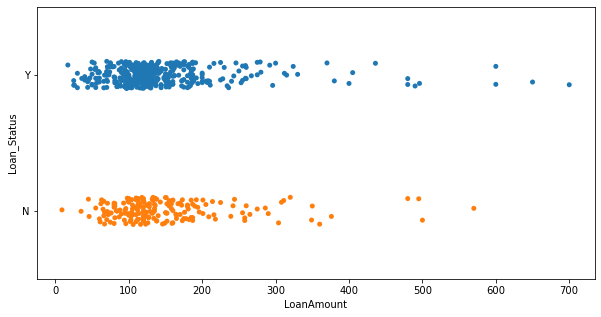

In [19]:
#Checking the distribution for continuous features.
plt.figure(figsize = (10,5))
sns.stripplot(x='LoanAmount',y = 'Loan_Status',data=df)
plt.show()

<AxesSubplot:>

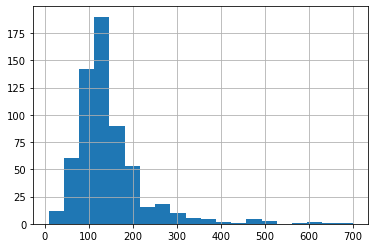

In [20]:
df['LoanAmount'].hist(bins=20)

In [43]:
# Imputing missing values for "LoanAmount" with median method as values are already scattered.
df.Credit_History = df.Credit_History.fillna('1.0')

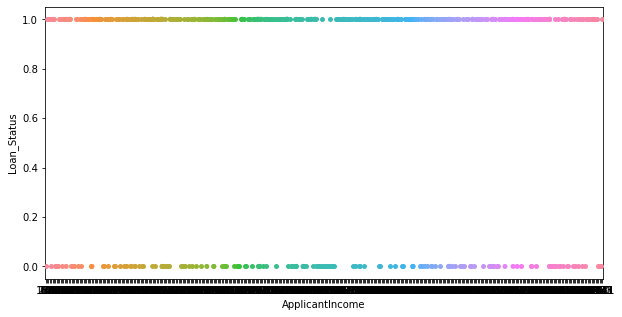

In [44]:
plt.figure(figsize = (10,5))
sns.stripplot(x='ApplicantIncome',y = 'Loan_Status',data=df)
plt.show()

<AxesSubplot:>

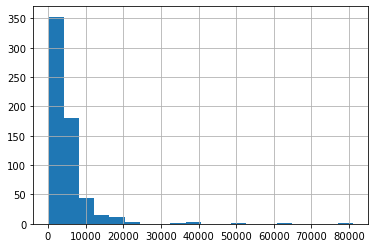

In [23]:
df['ApplicantIncome'].hist(bins=20)

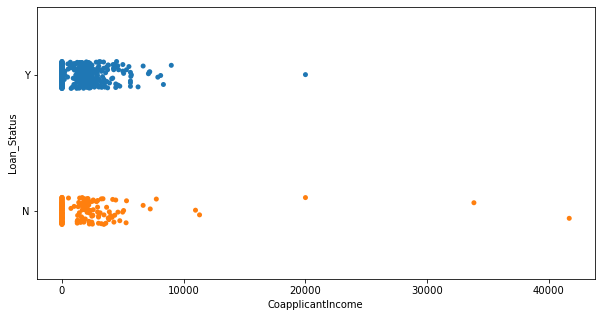

In [24]:
plt.figure(figsize = (10,5))
sns.stripplot(x='CoapplicantIncome',y = 'Loan_Status',data=df)
plt.show()

<AxesSubplot:>

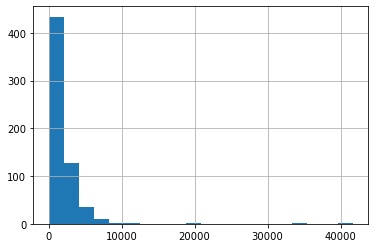

In [25]:
df['CoapplicantIncome'].hist(bins=20)

In [26]:
#Converting categorical columns into binary.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in cate_col:
    df[column] = le.fit_transform(df[column])

<AxesSubplot:>

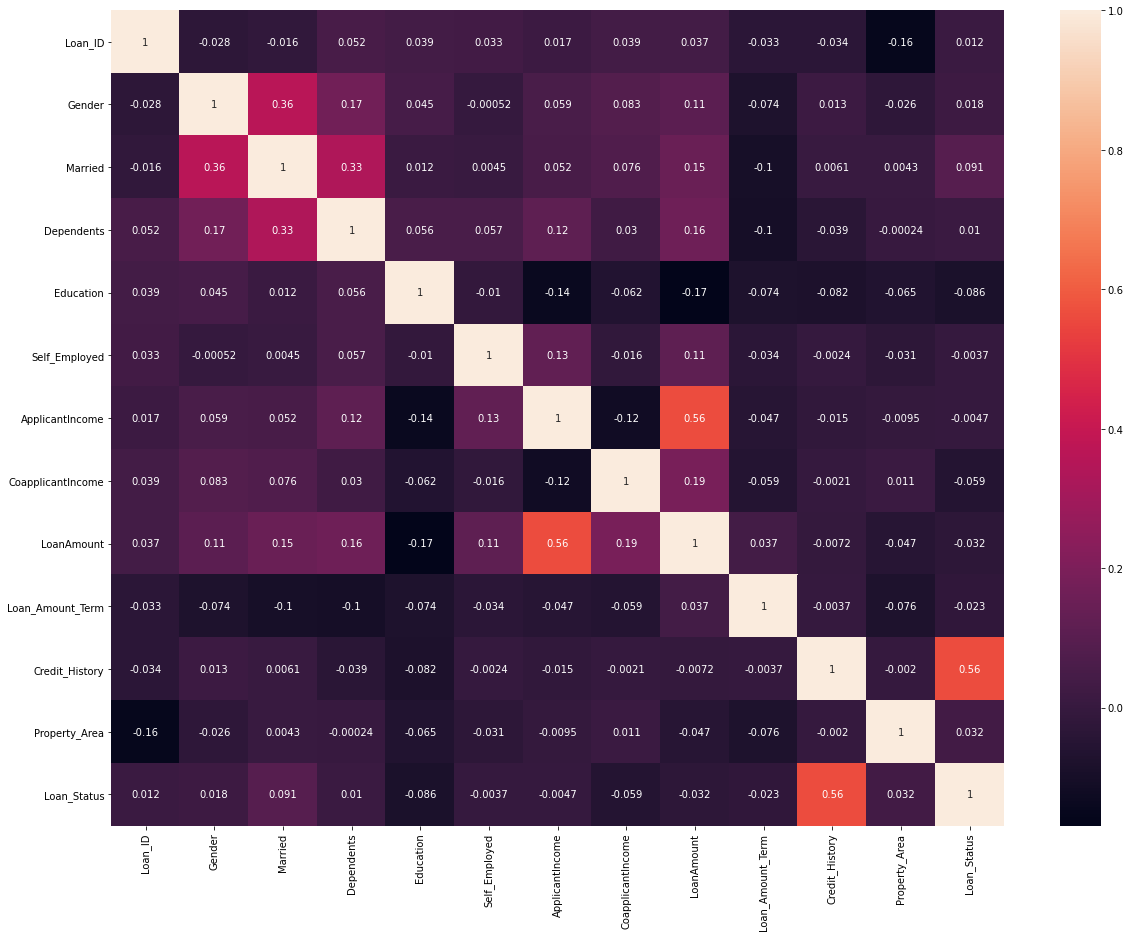

In [27]:
#chekcing correlation on heatmap
plt.figure(figsize = [20, 15]) 
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

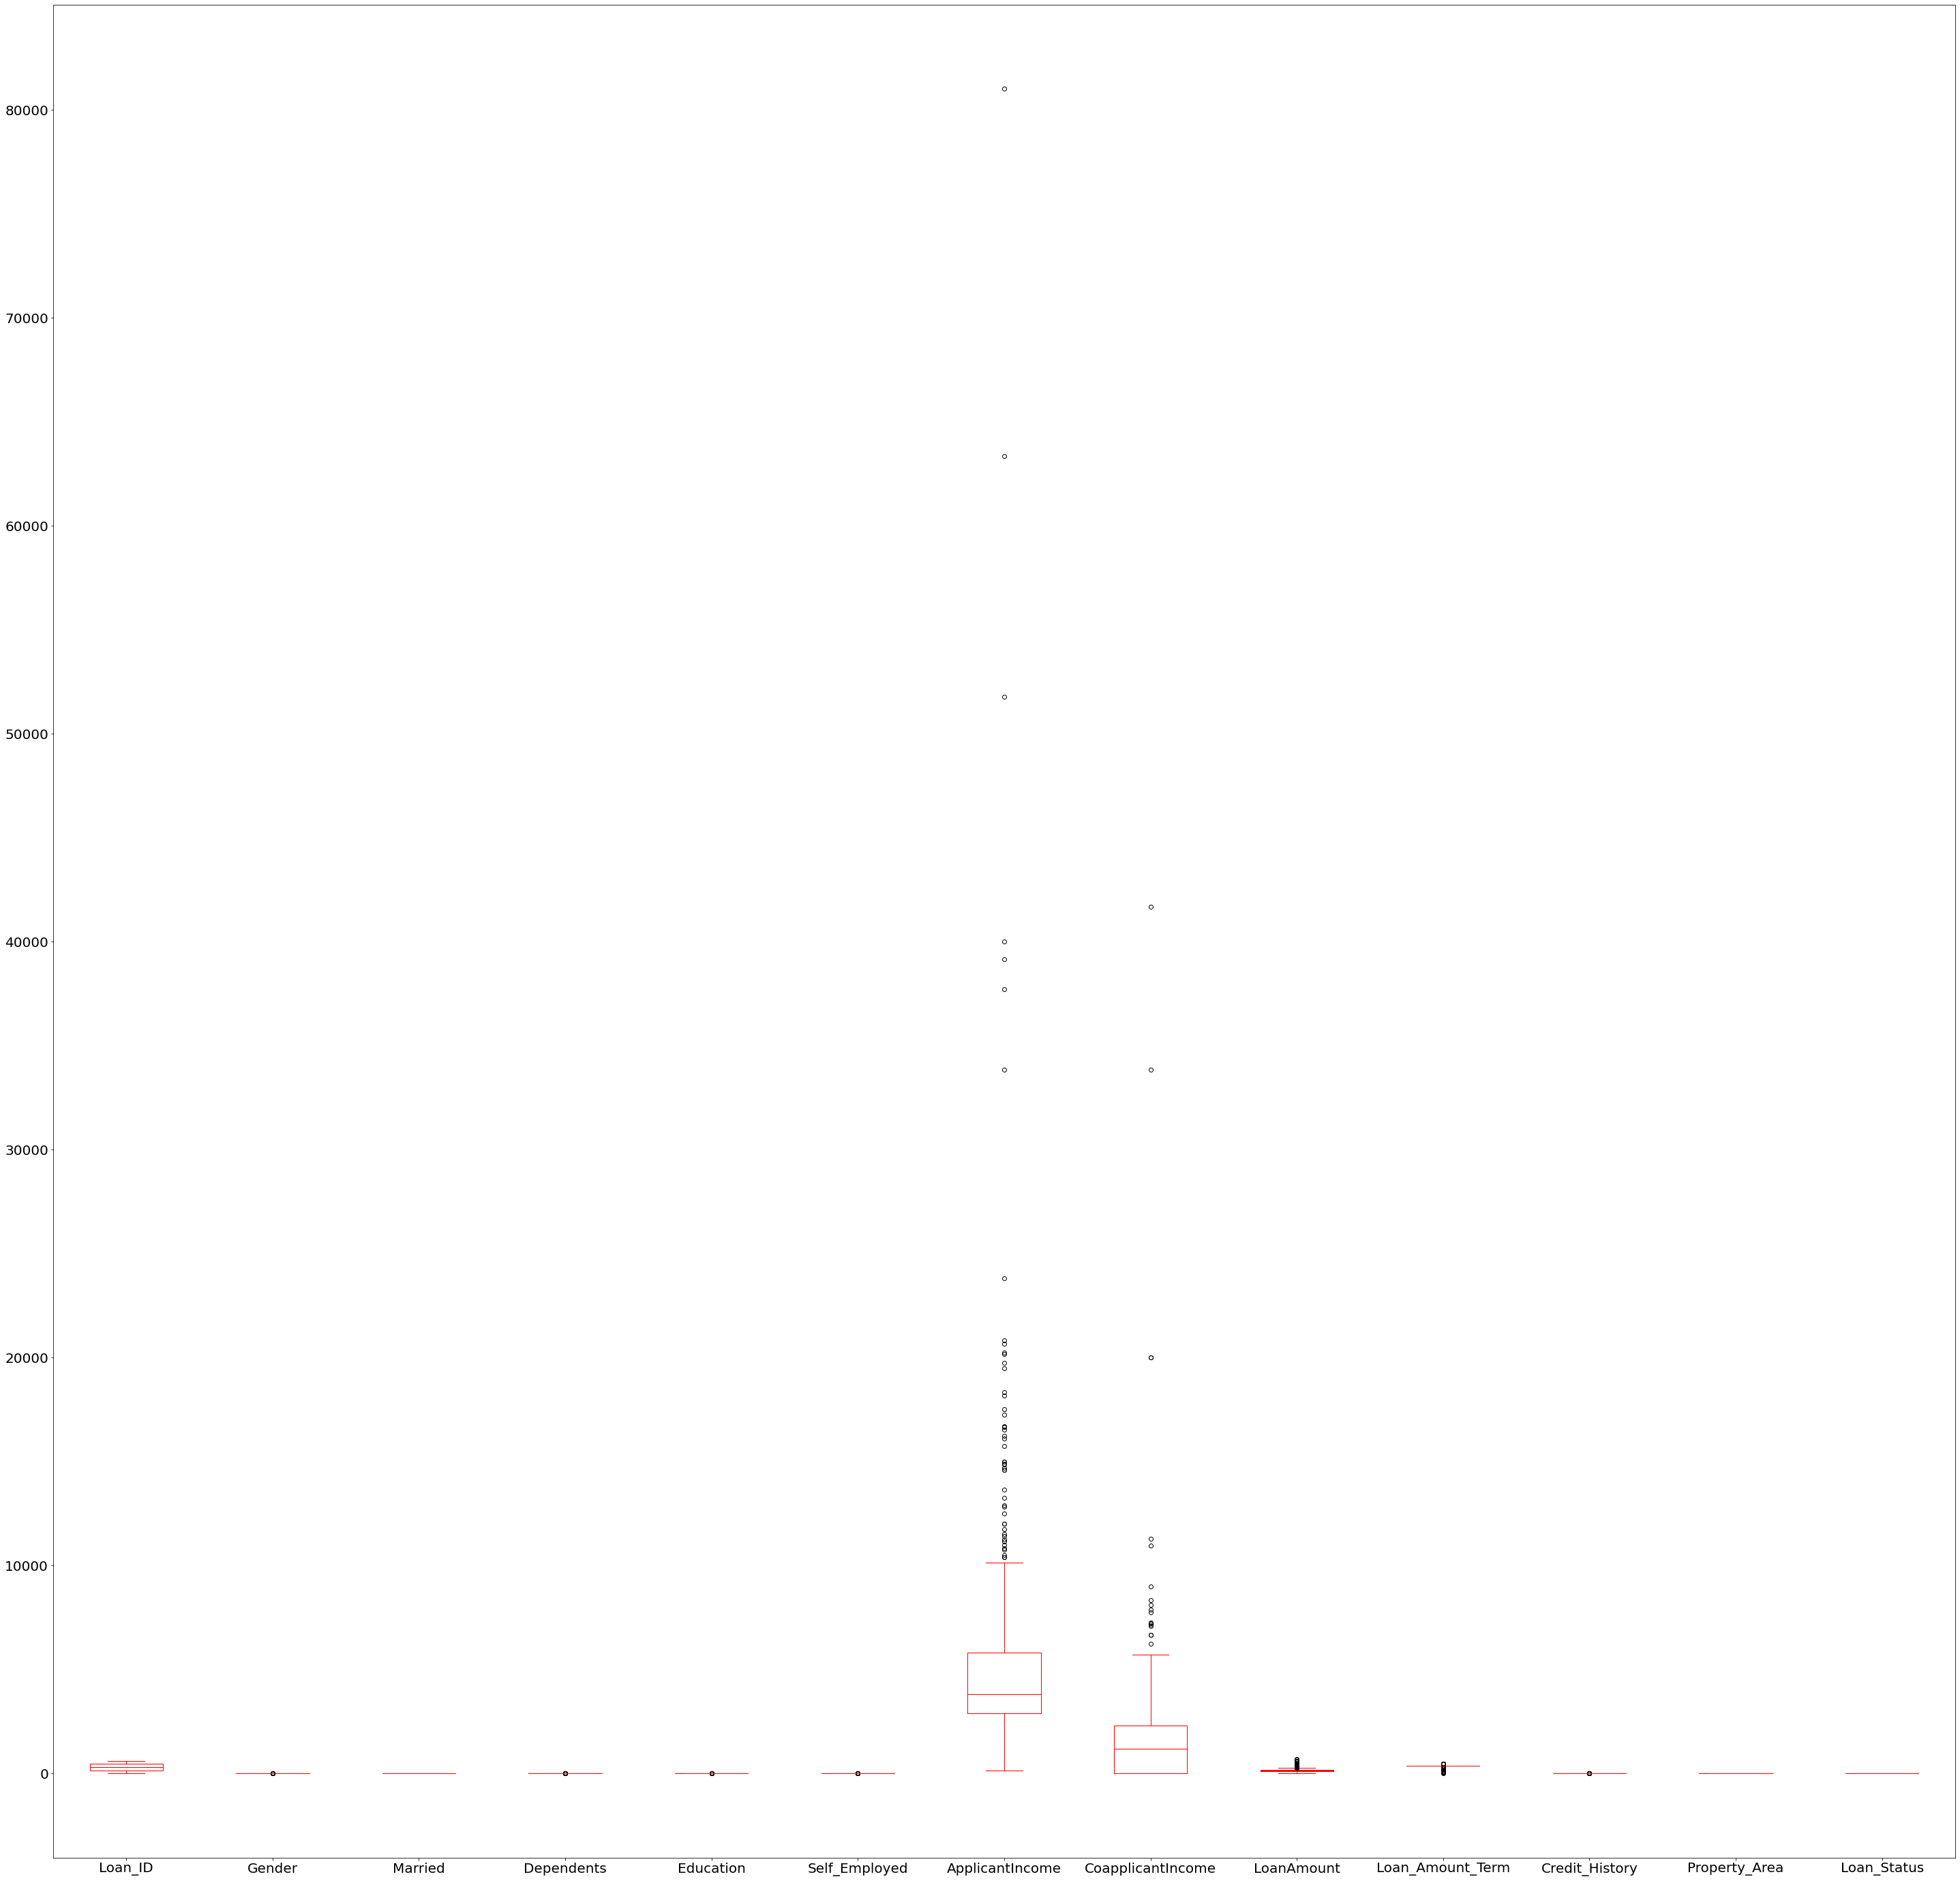

In [28]:
#Checking for skewness and outliers.
df.plot(kind = 'box',figsize =(50,50),fontsize =20 ,color ='r')

By observing the box plot we can say that there are outliers present in 'Gender','Dependents','Education','Self_Employed',ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',and 'Credit_History'. But "applicant income" and 'Coapplicant income" have more outliers as comparison to other variables.Now we need to remove the outliers from those column.

<AxesSubplot:title={'center':'Box-plot of ApplicantIncome'}, xlabel='ApplicantIncome'>

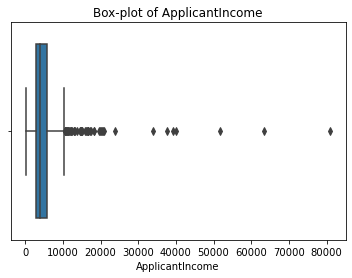

In [29]:
# checking outliers in applicant income
plt.title('Box-plot of ApplicantIncome')
sns.boxplot('ApplicantIncome',data=df)

In [30]:
# Removing Outliers
df=df[df['ApplicantIncome']<7500]

<AxesSubplot:title={'center':'Box-plot of ApplicantIncome'}, xlabel='ApplicantIncome'>

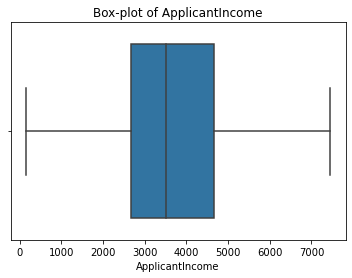

In [31]:
# After Removing outliers
plt.title('Box-plot of ApplicantIncome')
sns.boxplot('ApplicantIncome',data=df)

<AxesSubplot:title={'center':'Box-plot ofCoapplicantIncome '}, xlabel='CoapplicantIncome'>

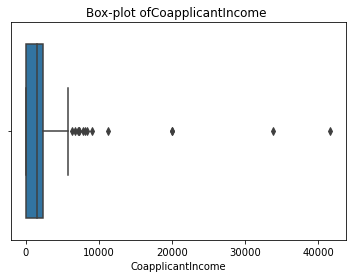

In [32]:
# checking outliers in  co-applicant income
plt.title('Box-plot ofCoapplicantIncome ')
sns.boxplot('CoapplicantIncome',data=df)

In [33]:
# Removing Outliers
df=df[df['CoapplicantIncome']<6000]

<AxesSubplot:title={'center':'Box-plot of CoapplicantIncome'}, xlabel='CoapplicantIncome'>

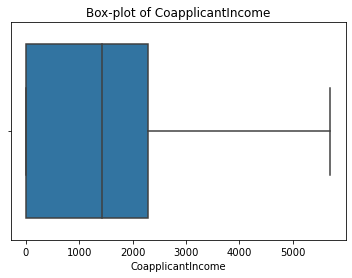

In [34]:
# After Removing outliers
plt.title('Box-plot of CoapplicantIncome')
sns.boxplot('CoapplicantIncome',data=df)

We have removed the outliers. now we will check the skewness.


In [35]:
df.skew()

Loan_ID             -0.003762
Gender              -1.590530
Married             -0.598698
Dependents           1.082628
Education            1.130958
Self_Employed        2.525386
ApplicantIncome      0.491586
CoapplicantIncome    0.776220
LoanAmount           0.970885
Loan_Amount_Term    -2.480232
Credit_History      -1.840808
Property_Area       -0.038059
Loan_Status         -0.825774
dtype: float64

In [36]:
# Removing skewness 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[['CoapplicantIncome','LoanAmount']] = scaler.fit_transform(df[['CoapplicantIncome','LoanAmount']].values)

In [37]:
#Droping loan id column,hence it is not useful.
df = df.drop("Loan_ID", axis=1)

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,-1.205172,-0.012356,360.0,1.0,2,1
1,1,1,1,0,0,4583,0.667452,0.161102,360.0,1.0,0,0
2,1,1,0,0,1,3000,-1.205172,-1.360712,360.0,1.0,2,1
3,1,1,0,1,0,2583,0.851378,-0.012356,360.0,1.0,2,1
4,1,0,0,0,0,6000,-1.205172,0.432699,360.0,1.0,2,1


In [48]:
# Splitting the dataset
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'], axis=1)

In [49]:
# Scaling the data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.483298,-1.342053,-0.709634,-0.584183,-0.348829,1.501158,-1.205172,-0.012356,0.253634,0.416667,1.249580
1,0.483298,0.745127,0.306706,-0.584183,-0.348829,0.595667,0.667452,0.161102,0.253634,0.416667,-1.305005
2,0.483298,0.745127,-0.709634,-0.584183,2.866737,-0.536554,-1.205172,-1.360712,0.253634,0.416667,1.249580
3,0.483298,0.745127,-0.709634,1.711792,-0.348829,-0.834808,0.851378,-0.012356,0.253634,0.416667,1.249580
4,0.483298,-1.342053,-0.709634,-0.584183,-0.348829,1.609158,-1.205172,0.432699,0.253634,0.416667,1.249580
...,...,...,...,...,...,...,...,...,...,...,...
502,0.483298,0.745127,1.323047,1.711792,-0.348829,0.169386,0.641019,0.751653,0.253634,0.416667,-1.305005
503,0.483298,0.745127,-0.709634,-0.584183,-0.348829,-0.370618,0.771873,-0.282815,0.253634,0.416667,-1.305005
504,-2.069118,-1.342053,-0.709634,-0.584183,-0.348829,-0.608077,-1.205172,-1.218520,0.253634,0.416667,-1.305005
505,0.483298,0.745127,2.339387,-0.584183,-0.348829,0.254499,-1.205172,-2.196983,-2.501922,0.416667,-1.305005


In [50]:
maxAccu = 0
maxRS = 0
for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.24, random_state=i)
    rf= RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best accuracy is ", maxAccu, " on Random_state", maxRS)
    

Best accuracy is  0.8770491803278688  on Random_state 41


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.24, random_state=maxRS)

In [52]:
x_train.shape

(385, 11)

In [53]:
x_test.shape

(122, 11)

In [54]:
y_train.shape

(385,)

In [55]:
y_test.shape

(122,)

In [56]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.3095766540436482


In [60]:
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))


MSE: 0.1116021792895483
MAE: 0.2690886748189762
r2_score: -0.8257534135221294


In [61]:
# USING SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.37367375006520953
MSE: 0.11075589154987693
MAE: 0.2688083392173609
RMSE: 0.33280007744872436


In [63]:
# USING LASSO
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [64]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.06300945176483053
MSE: 0.18797640936878748
MAE: 0.41077283372365325
RMSE: 0.4335624630532347


In [65]:
# USING RIDGE
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [66]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.36927114809358763
MSE: 0.11153442207858619
MAE: 0.27121989325009216
RMSE: 0.3339676961602517


In [67]:
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression()

# feeding the training set into the model
lr.fit(x_train, y_train)

# predicting the results for the test set
y_pred = lr.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", lr.score(x_train, y_train))
print("Testing accuracy :", lr.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7922077922077922
Testing accuracy : 0.8934426229508197
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        28
           1       0.88      1.00      0.94        94

    accuracy                           0.89       122
   macro avg       0.94      0.77      0.82       122
weighted avg       0.91      0.89      0.88       122

[[15 13]
 [ 0 94]]


In [68]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Test Accuracy: 86.07%


In [69]:
# USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7377049180327869


In [72]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.57      0.50        28
           1       0.86      0.79      0.82        94

    accuracy                           0.74       122
   macro avg       0.65      0.68      0.66       122
weighted avg       0.76      0.74      0.75       122

[[16 12]
 [20 74]]


In [73]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8688524590163934


In [74]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        28
           1       0.88      0.96      0.92        94

    accuracy                           0.87       122
   macro avg       0.84      0.76      0.79       122
weighted avg       0.86      0.87      0.86       122

[[16 12]
 [ 4 90]]


In [75]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 0.150674, 0.020700
R   : 0.150648, 0.020678
svr   : 0.155092, 0.024791
svr_p   : 0.247524, 0.036833
svr_r   : 0.171580, 0.033192
RF   : 0.154546, 0.030674
DTR   : 0.282275, 0.054699
GBR   : 0.166222, 0.029623


In [76]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [78]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [79]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [80]:
rf_randomized.best_params_

{'n_estimators': 288,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [81]:
rf_final=rf_randomized.best_estimator_

In [82]:
y_pred_random=rf_final.predict(x_test)

Hence, we can see that Random Forest gives us the best accuracy score of 85 %

In [84]:
# AUC ROC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.7644376899696048

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [86]:
fpr

array([0.        , 0.42857143, 1.        ])

In [87]:
tpr

array([0.        , 0.95744681, 1.        ])

In [88]:
thresholds

array([2, 1, 0], dtype=int64)

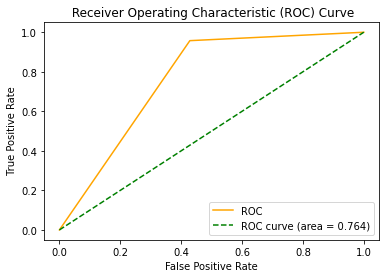

In [89]:
# Plotting AUC ROC Curve
plt.plot(fpr, tpr, color='orange',label='ROC')
plt.plot([0, 1],[0, 1], color='green', linestyle='--', label='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
# Saving The model
import pickle
file = 'LOAN STATUS PREDICTION CASE STUDY.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [ ]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com